In [2]:
# Loading needed libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance

In [3]:
# Read needed dataset
U2_New_Combine_Data = pd.read_csv('Dataset/U2NewCombinedFeatureswithInterFactors.csv')
U2_New_Combine_Data

,FirstLayer_task_speed_factor_1,FirstLayer_task_share_factor_1,FirstLayer_task_speed_factor_2,playerName,U2PostScoreLevel,FirstLayer_arg_freq_factor_1,FirstLayer_arg_freq_factor_2,FirstLayer_arg_freq_factor_3,FirstLayer_arg_freq_factor_4,FirstLayer_arg_speed_factor_1,...,biggerArgScore,SecondLayer_item_Inter_factor_3,SecondLayer_item_Inter_factor_4,ThirdLayer_Inter_factor_1,ThirdLayer_Inter_factor_2,ThirdLayer_Inter_factor_3,ThirdLayer_Inter_factor_4,ThirdLayer_Inter_factor_5,ThirdLayer_Inter_factor_6,ThirdLayer_Inter_factor_7
0,228,304,59,0,0,161,100,43,269,106,...,303,150,176,159,160,123,315,74,20,26
1,91,252,42,1,1,80,290,27,258,198,...,290,248,207,20,17,287,283,180,258,75
2,130,172,4,2,0,287,31,48,115,248,...,29,40,315,171,224,272,191,12,286,21
3,193,201,73,2,0,27,53,53,222,66,...,183,190,224,233,126,93,66,21,33,12
4,288,293,163,3,0,43,145,31,194,127,...,73,56,251,114,214,44,179,147,143,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,71,26,53,243,1,77,257,45,135,226,...,268,291,54,119,100,180,52,36,109,86
317,299,97,131,244,0,256,306,1,297,302,...,59,267,221,261,165,245,216,16,11,36
318,139,154,297,245,0,64,307,27,228,176,...,165,125,144,193,43,145,202,6,16,236
319,199,309,181,246,0,260,36,45,179,103,...,118,29,25,315,139,198,294,86,223,256


In [4]:
# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in U2_New_Combine_Data.columns:
    U2_New_Combine_Data[col] = encoder.fit_transform(U2_New_Combine_Data[col])

y_label = U2_New_Combine_Data['U2PostScoreLevel']
X_features = U2_New_Combine_Data.drop(['playerName','U2PostScoreLevel'],axis=1)

In [5]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42, stratify=y_label)

In [6]:
# Define classifiers
classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', make_pipeline(StandardScaler(), XGBClassifier(eval_metric='logloss'))),
    ('ada', AdaBoostClassifier(n_estimators=100)),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression())),
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier())),
    ('gnb', GaussianNB()),
    ('svc', make_pipeline(StandardScaler(), SVC(probability=True, kernel='linear'))),
    ('lda', LinearDiscriminantAnalysis()),
    ('qda', QuadraticDiscriminantAnalysis())
]

In [7]:
ensemble = VotingClassifier(estimators=classifiers, voting='hard')
ensemble.fit(X_train, y_train)

C:\Users\wldh6\anaconda3\envs\paper-3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('xgb',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('xgbclassifier',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_stop...
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('knn',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier())])),
                             ('gnb', GaussianNB()),
                             ('svc',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(kernel='linear',
                                                   probability=True))])),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('qda', QuadraticDiscriminantAnalysis())])

In [8]:
# Initialize array to store importances
n_repeats = 10
importance_scores = np.zeros((n_repeats, X_features.shape[1]))

# Repeat the permutation process
for i in range(n_repeats):
    r = permutation_importance(ensemble, X_test, y_test, n_repeats=10, random_state=i)
    importance_scores[i] = r.importances_mean

In [9]:
# Calculate the average importances across all repetitions
average_importances = importance_scores.mean(axis=0)

# Display or process the average importances
print("Average Permutation Importances:", average_importances)

Average Permutation Importances: [ 0.00261538  0.02953846  0.01092308  0.01369231  0.02876923  0.00553846
 -0.01507692 -0.00076923  0.00676923  0.01569231  0.00892308 -0.00446154
  0.00384615  0.00584615  0.00446154  0.02507692  0.01076923  0.01923077
  0.00553846 -0.00938462 -0.01       -0.01369231  0.01230769 -0.00507692
 -0.00523077  0.01846154  0.00169231  0.01753846  0.01276923  0.00230769
  0.00107692  0.00507692  0.00769231 -0.00369231 -0.01215385  0.00538462
 -0.00261538 -0.00261538  0.02015385  0.00123077 -0.00569231 -0.00030769
 -0.01584615 -0.00569231 -0.01061538  0.01692308  0.00430769 -0.00476923
 -0.00723077  0.00276923 -0.01384615 -0.00338462  0.01307692  0.00553846
 -0.01492308  0.02523077 -0.012       0.06430769  0.00446154  0.00492308
 -0.00307692  0.01476923  0.00738462  0.01353846  0.03446154  0.01415385
 -0.00015385  0.01784615  0.01984615  0.01107692 -0.00969231  0.00630769
  0.00261538 -0.00707692 -0.00107692  0.02476923  0.01107692]


In [46]:
#perm = PermutationImportance(ensemble, random_state=1).fit(X_train, y_train)
#importances_df = eli5.explain_weights_df(perm, feature_names = X_features.columns.tolist())
#print(importances_df)

In [10]:
imprtance_df_series = pd.Series(average_importances, index = X_features.columns) 
imprtance_df_series

FirstLayer_task_speed_factor_1    0.002615
FirstLayer_task_share_factor_1    0.029538
FirstLayer_task_speed_factor_2    0.010923
FirstLayer_arg_freq_factor_1      0.013692
FirstLayer_arg_freq_factor_2      0.028769
                                    ...   
ThirdLayer_Inter_factor_3         0.002615
ThirdLayer_Inter_factor_4        -0.007077
ThirdLayer_Inter_factor_5        -0.001077
ThirdLayer_Inter_factor_6         0.024769
ThirdLayer_Inter_factor_7         0.011077
Length: 77, dtype: float64

In [11]:
# Define the default color and the highlight color
default_color = 'blue'
highlight_color = 'orange'

# Create a list of colors
colors = [highlight_color if feature in ["CREIScore", "findTeamAveScore", "biggerArgScore"] else default_color for feature in imprtance_df_series.nlargest(36).index]

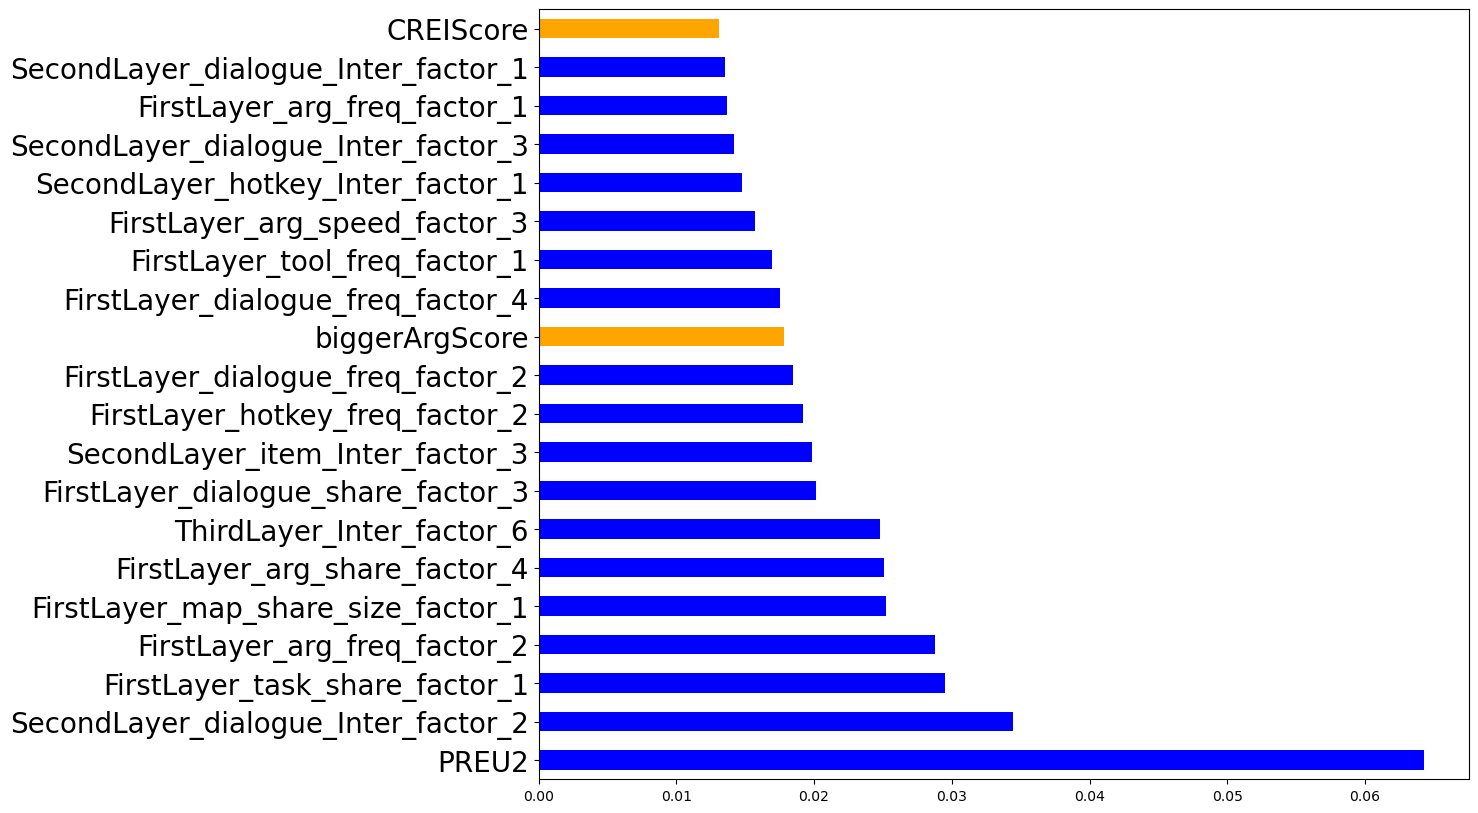

In [54]:
plt.figure(figsize=(12,10))
ax = imprtance_df_series.nlargest(36).plot(kind='barh', color = colors)
ax.tick_params(axis = "y", labelsize=20)
plt.show()